In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive

Mounted at /content/drive
/content/drive/MyDrive


# I. Thống kê mô tả

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [3]:
# !pip install sweetviz
# !pip install autoviz
# !pip install dtale

In [4]:
wine = pd.read_csv("Data_Python_ST3/BT1/winequality-red.csv")
df = wine.copy()
# Take a quick look at the data
print(df.dtypes)
print(df.shape)
df.head(10).style.background_gradient(cmap = "Purples_r")

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object
(1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.400000,0.700000,0.000000,1.900000,0.076000,11.000000,34.000000,0.997800,3.510000,0.560000,9.400000,5
1,7.800000,0.880000,0.000000,2.600000,0.098000,25.000000,67.000000,0.996800,3.200000,0.680000,9.800000,5
2,7.800000,0.760000,0.040000,2.300000,0.092000,15.000000,54.000000,0.997000,3.260000,0.650000,9.800000,5
3,11.200000,0.280000,0.560000,1.900000,0.075000,17.000000,60.000000,0.998000,3.160000,0.580000,9.800000,6
4,7.400000,0.700000,0.000000,1.900000,0.076000,11.000000,34.000000,0.997800,3.510000,0.560000,9.400000,5
5,7.400000,0.660000,0.000000,1.800000,0.075000,13.000000,40.000000,0.997800,3.510000,0.560000,9.400000,5
6,7.900000,0.600000,0.060000,1.600000,0.069000,15.000000,59.000000,0.996400,3.300000,0.460000,9.400000,5
7,7.300000,0.650000,0.000000,1.200000,0.065000,15.000000,21.000000,0.994600,3.390000,0.470000,10.000000,7
8,7.800000,0.580000,0.020000,2.000000,0.073000,9.000000,18.000000,0.996800,3.360000,0.570000,9.500000,7
9,7.500000,0.500000,0.360000,6.100000,0.071000,17.000000,102.000000,0.997800,3.350000,0.800000,10.500000,5


In [5]:
df.drop_duplicates(inplace=True)
df.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [6]:
df.describe().T.style.background_gradient(cmap = "magma")

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1359.000000,8.310596,1.736990,4.600000,7.100000,7.900000,9.200000,15.900000
volatile acidity,1359.000000,0.529478,0.183031,0.120000,0.390000,0.520000,0.640000,1.580000
citric acid,1359.000000,0.272333,0.195537,0.000000,0.090000,0.260000,0.430000,1.000000
residual sugar,1359.000000,2.523400,1.352314,0.900000,1.900000,2.200000,2.600000,15.500000
chlorides,1359.000000,0.088124,0.049377,0.012000,0.070000,0.079000,0.091000,0.611000
free sulfur dioxide,1359.000000,15.893304,10.447270,1.000000,7.000000,14.000000,21.000000,72.000000
total sulfur dioxide,1359.000000,46.825975,33.408946,6.000000,22.000000,38.000000,63.000000,289.000000
density,1359.000000,0.996709,0.001869,0.990070,0.995600,0.996700,0.997820,1.003690
pH,1359.000000,3.309787,0.155036,2.740000,3.210000,3.310000,3.400000,4.010000
sulphates,1359.000000,0.658705,0.170667,0.330000,0.550000,0.620000,0.730000,2.000000


II. Xử lí và trực quan hóa dữ liệu

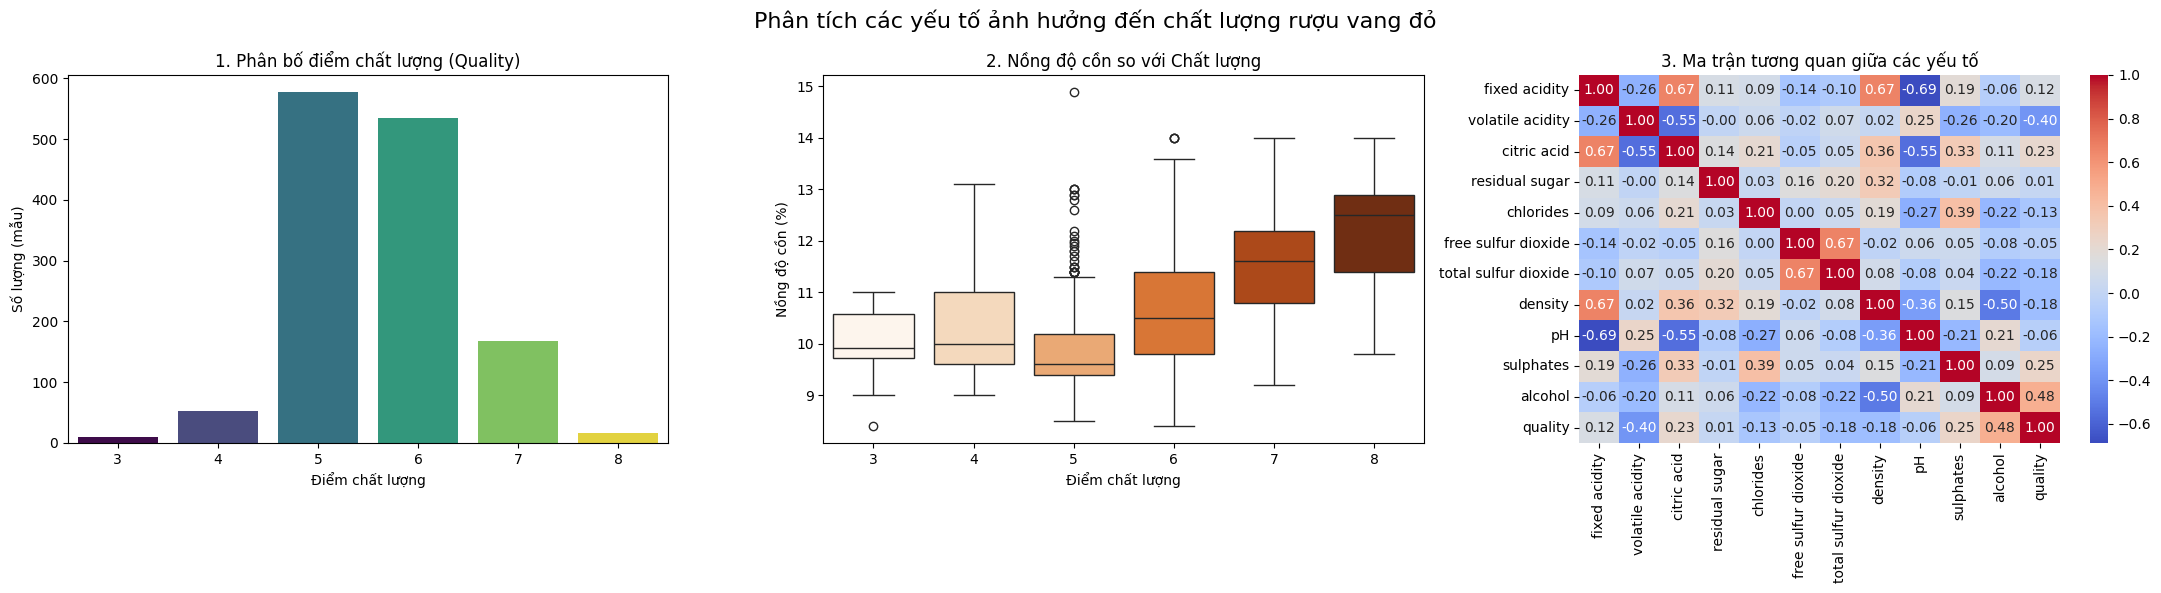

In [7]:
fig, axes = plt.subplots(1, 3, figsize=(22, 6))
fig.suptitle('Phân tích các yếu tố ảnh hưởng đến chất lượng rượu vang đỏ', fontsize=16)
#Biểu đồ 1
sns.countplot(ax=axes[0], data=df, x='quality', hue = 'quality', palette='viridis', legend = False)
axes[0].set_title('1. Phân bố điểm chất lượng (Quality)')
axes[0].set_xlabel('Điểm chất lượng')
axes[0].set_ylabel('Số lượng (mẫu)')
#Biểu đồ 2
sns.boxplot(ax=axes[1], data=df, x='quality', y='alcohol', hue = 'quality', palette='Oranges', legend = False)
axes[1].set_title('2. Nồng độ cồn so với Chất lượng')
axes[1].set_xlabel('Điểm chất lượng')
axes[1].set_ylabel('Nồng độ cồn (%)')
#Biểu đồ 3
correlation_matrix = df.corr()
sns.heatmap(ax=axes[2], data=correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
axes[2].set_title('3. Ma trận tương quan giữa các yếu tố')

plt.tight_layout()
plt.show()